# Analyser bøker med en familie ordsekker
Denne kan du bruke hvis du allerede har noen temaer ('topics').

In [1]:
import json
import sqlite3
import pandas as pd

import dhlab.nbtext as nb
import matplotlib.pyplot as plt
from dhlab.api.dhlab_api import word_paradigm_many


# import dhlab.module_update as mu
# mu.update('mods_meta')
# mu.update('wordbank')
# import mods_meta as mm

# from dhlab.nbtokenizer import tokenize
# from wordbank import word_paradigm_many

In [2]:
def declensions(wordbagfamily, pos = None):
    """Set pos to subst, verb or adj for limiting the inflectional forms"""
    if isinstance(pos, list):
        res = {key: list(set([w for infl_set in word_paradigm_many(wordbagfamily[key]) for w in infl_set[2] if infl_set [1] in pos])) for key in wordbagfamily}
    elif isinstance( pos, str):
        res = {key: list(set([w for infl_set in word_paradigm_many(wordbagfamily[key]) for w in infl_set[2] if infl_set [1] == pos])) for key in wordbagfamily}
    else:
        res = {key: list(set([w for infl_set in word_paradigm_many(wordbagfamily[key]) for w in infl_set[2]])) for key in wordbagfamily}
    return res

# Lag temafamilien 

Her legger du inn temaene dine ("familier" med ordsekker), først tittel du gir dem ("label"), deretter temaordene. 

In [3]:
topics = {
    'vehicles_': "kjøretøy biler bil moped motorsykkel".split(),
    'collective_': "fly tog buss trikk kollektivtransport lastebiler".split(),
    'roads_': "vei gate motorvei grusvei fortau".split(),
    'traffic_': "trafikk rushtid trafikk-kaos påsketrafikk".split(),
    'soft_': "fotgjengere gående sykkel sykling".split(),
}

Fyll opp med bøyde former, for vi er interesserte i å få treff på forskjellige bøyninger av ordene også. 

Hvis du får feilmelding når du kjører denne, prøv simpelthen å kjøre den på nytt. 

In [4]:
fullform_topics = declensions(topics, pos=['subs','verb'])

In [5]:
fullform_topics

{'vehicles_': ['bilene',
  'mopeden',
  'kjøretøya',
  'motorsykler',
  'kjøretøyene',
  'kjøretøyet',
  'bile',
  'kjøretøyer',
  'kjøretøy',
  'biler',
  'moped',
  'motorsykkel',
  'bilen',
  'mopeder',
  'motorsykkelen',
  'bil',
  'bilte',
  'bilt',
  'motorsyklene',
  'mopedene',
  'biles',
  'bila'],
 'collective_': ['tog',
  'bussen',
  'flya',
  'lastebilen',
  'toga',
  'busset',
  'bussa',
  'fløy',
  'toger',
  'lastebiler',
  'trikke',
  'bussene',
  'toge',
  'busse',
  'flyen',
  'toges',
  'fløyet',
  'flaug',
  'togene',
  'trikkene',
  'trikka',
  'flyet',
  'trikket',
  'flyr',
  'flys',
  'busses',
  'trikk',
  'flyene',
  'flydd',
  'lastebil',
  'trikken',
  'trikkes',
  'toget',
  'trikker',
  'buss',
  'flyer',
  'lastebilene',
  'busser',
  'fly'],
 'roads_': ['veie',
  'gatene',
  'gata',
  'motorvei',
  'fortauene',
  'veid',
  'vei',
  'veide',
  'motorveien',
  'veies',
  'grusvei',
  'motorveier',
  'veiene',
  'veien',
  'grusveiene',
  'motorveiene',
  '

# Definer et korpus ved å sample bøker med metadata

### Her finner du Dewey-koder: https://deweysearchno.pansoft.de/webdeweysearch/mainClasses.html

In [6]:
korpus = {yearstart: nb.book_corpus(ddk = '839%', limit = 10000, period = (yearstart, yearstart + 10)) for yearstart in range(1960, 2010, 10)}

# Ta en titt på korpus

In [7]:
korpus[1970].head(5)

,urn,author,title,year
0,2011011106109,"Rakeng, Oddvar",Det nye diktet,1971
1,2014091608057,"Bøgenæs, Evi",To + to = fire,1971
2,2012060706049,"Andersen, Egil Nic.",Sneen på Chinkkavarre,1978
3,2012021308039,"Stigen, Terje",Norsk rapsodi,1972
4,2007072300015,"Bruheim, Jan-Magnus",På langferd med Mjo Monsemann,1970


# Forberedelser for å analysere distribusjonen av temaene i korpuset

In [16]:
from dhlab.api.dhlab_api import evaluate_documents

In [21]:
list(korpus[1970].urn)

[2011011106109,
 2014091608057,
 2012060706049,
 2012021308039,
 2007072300015,
 2012070206000,
 2012112606061,
 2013112708005,
 2012111506034,
 2014021806167,
 2012062006111,
 2012012308062,
 2013091707061,
 2013061906053,
 2013013007020,
 2012112707005,
 2013012508187,
 2012110807135,
 2007072301095,
 2015072308193,
 2007072501028,
 2012041108064,
 2013041007003,
 2008060301004,
 2013040807014,
 2007070601006,
 2012062505012,
 2013062138068,
 2012060108101,
 2014100108068,
 2007070204054,
 2006081800063,
 2012033008011,
 2007072601109,
 2012030508098,
 2014101408295,
 2016020926001,
 2013022006039,
 2013012407022,
 2011011706039,
 2013061306037,
 2007053004002,
 2013012805122,
 2013121108098,
 2012100807042,
 2011101408135,
 2015102208201,
 2011060108044,
 2013030608183,
 2012041108138,
 2015010648003,
 2006110701010,
 2011062408129,
 2011011206135,
 2016022448091,
 2012060705036,
 2011121908002,
 2015072408105,
 2014070308090,
 2012110108085,
 2013041807134,
 2007072001056,
 2006081

In [17]:
#korpus_eval = {year: nb.wordbag_eval(fullform_topics, list(korpus[year].urn)) for year in korpus}
korpus_eval = {year: evaluate_documents(fullform_topics, list(korpus[year].urn)) for year in korpus}

In [18]:
korpus_eval

{1960: Empty DataFrame
 Columns: []
 Index: [],
 1970: Empty DataFrame
 Columns: []
 Index: [],
 1980: Empty DataFrame
 Columns: []
 Index: [],
 1990: Empty DataFrame
 Columns: []
 Index: [],
 2000: Empty DataFrame
 Columns: []
 Index: []}

In [9]:
korpus[1970].urn

0       2011011106109
1       2014091608057
2       2012060706049
3       2012021308039
4       2007072300015
            ...      
5364    2012071106046
5365    2012062006045
5366    2012051808152
5367    2007073001065
5368    2011062105109
Name: urn, Length: 5369, dtype: int64

In [10]:
def plotfig(a_plot, font_size=18):
    fsize = plt.rcParams["font.size"]
    plt.rcParams["font.size"] = font_size
    
    ax = a_plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    
    return

In [12]:
#d.set_option('max_rows', None)

In [13]:
df = nb.frame_sort(korpus_eval[1970],'soft_').head(20)
prefix = 'https://urn.nb.no/URN:NBN:no-nb_digibok_'
df['url'] = '<a href ='+ prefix + df.index + '>' + df.index + '</a>'
df.style

,collective_,roads_,soft_,vehicles_,traffic_,snitt,url
2010081920002,15.000000,213.000000,1893.000000,15.000000,2.000000,427.600000,2010081920002
2013040507082,137.000000,472.000000,1386.000000,87.000000,3.000000,417.000000,2013040507082
2013041806043,201.000000,273.000000,1232.000000,151.000000,5.000000,372.400000,2013041806043
2014030506077,39.000000,294.000000,993.000000,43.000000,14.000000,276.600000,2014030506077
2012111406225,44.000000,266.000000,990.000000,59.000000,1.000000,272.000000,2012111406225
2013102407127,19.000000,13.000000,982.000000,0.000000,0.000000,202.800000,2013102407127
2012022908046,48.000000,215.000000,963.000000,110.000000,2.000000,267.600000,2012022908046
2013082605099,18.000000,190.000000,960.000000,3.000000,0.000000,234.200000,2013082605099
2012092108115,10.000000,199.000000,948.000000,15.000000,0.000000,234.400000,2012092108115
2016091648060,47.000000,139.000000,917.000000,13.000000,3.000000,223.800000,2016091648060


# Visualiser fordelingen tiår for tiår

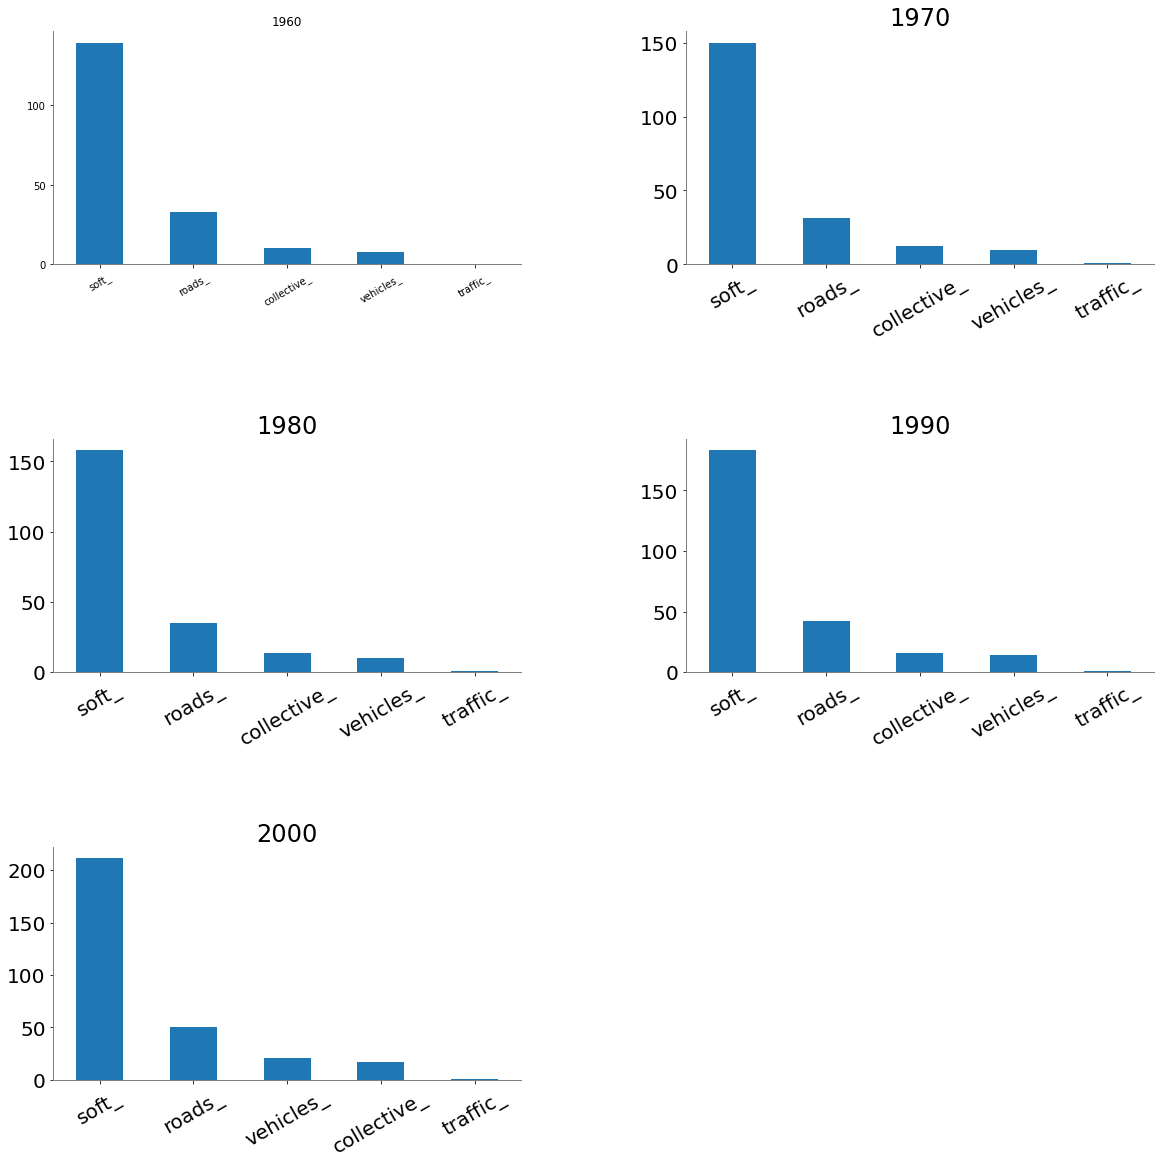

In [14]:
for i,y in enumerate(korpus_eval):
    num = 321 + i
    plt.subplot(num)
    plotfig(korpus_eval[y].mean()[list(topics.keys())].sort_values(ascending=False).plot(kind='bar', rot=30, figsize=(18,8), title=str(y)), font_size = 20) 
plt.subplots_adjust(top=1.90, bottom=0.08, left=0.10, right=0.95, hspace=0.75, wspace=0.35)